# ALGORITMO PARA PREDIÇÃO DE MANUTENÇÃO PREDITIVA

O objetivo desse algoritmo é predizer quando será necessário a realização de Manutenção, para isso, uma rede neural do tipo Perceptron Multicamdas analisará as medições de centenas de sensores e informara quando a manutenção é recomendada.

In [1]:
# Carregar Bibliotecas Principais
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [2]:
# Carregar tabela com os valores de medições dos sensores.
sensores  = pd.read_csv('uci-secom.csv')
sensores.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


# LIMPEZA DE DADOS

Nessa fase realiza-se uma análise dos dados para excluir dados não confiáveis e/ou ruídos.

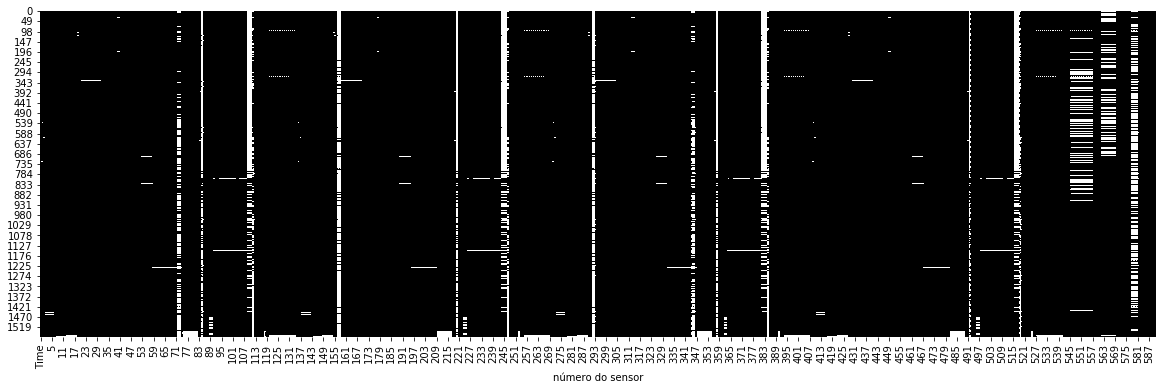

In [3]:
# mapa de calor binário em que o preto representa célular com valor e o branco célula vazia.
plt.figure(figsize=(20, 6))
sns.heatmap(sensores.isnull(), cmap='gray', cbar=False)
plt.xlabel('número do sensor')
plt.autoscale(tight=True, axis='x')
plt.savefig('figtest.png')

In [4]:
# Excluir as colunas com mais de 50% de valores faltantes.
nulos = sensores.isnull().sum() # conta a quantidade de valores nulos por sensor
dimensao = np.shape(sensores)
dimensao_x = dimensao[1]

In [5]:
for i in range(len(nulos)):
    if nulos[i] > (dimensao_x/2):
        a = str(i)
        sensores.drop(a, axis=1, inplace=True)

In [6]:
nova_dimensao = np.shape(sensores)
nova_dimensao_x = nova_dimensao[1]

In [7]:
r = dimensao_x - nova_dimensao_x # nº de sensores deletados
r

32

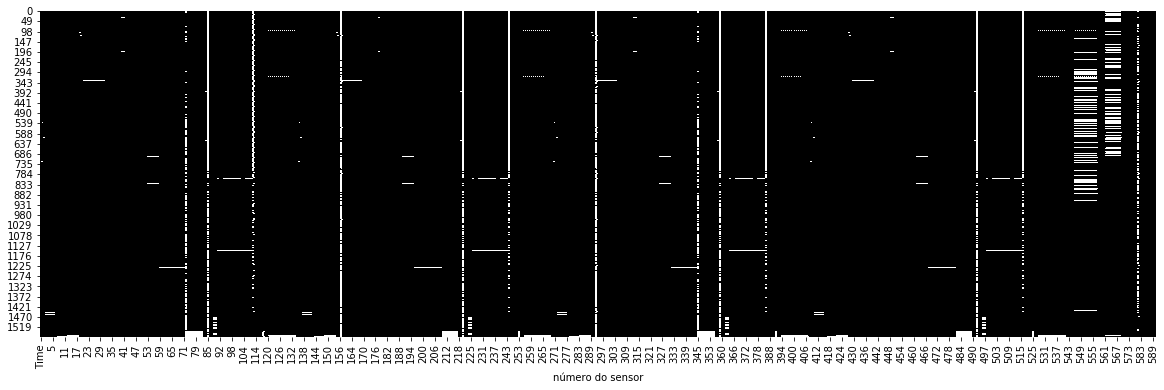

In [8]:
plt.figure(figsize=(20, 6))
sns.heatmap(sensores.isnull(), cmap='gray', cbar=False)
plt.xlabel('número do sensor')
plt.autoscale(tight=True, axis='x')
plt.savefig('figtest.png')

In [9]:
# Mesmo após a exclusão de 32 colunas ainda se tem muitos dados faltantes, iremos preencher
# os valores nulos será preenchido com a média dos valores das medições:

In [10]:
saida = sensores['Pass/Fail'] 
media = sensores.mean()
sensores.fillna(media, inplace=True)

In [11]:
# verificar se todos os valores foram preenchidos
nulos = sensores.isnull().sum()
nulos.sum()

0

Após tratamento das células vazias será realizado uma análise no conjunto de dados

In [12]:
from sklearn.feature_selection import VarianceThreshold # Biblioteca especifica

In [13]:
x = sensores.iloc[:,1:nova_dimensao_x-1]
y = sensores.iloc[:, nova_dimensao_x-1]

In [14]:
limiar = VarianceThreshold(threshold=.5) # elimina sensores com variancia menor que 0.5.
x_limiar = limiar.fit_transform(x)
sensores = pd.DataFrame(x_limiar)

In [15]:
sensores['Pass/Fail'] = saida

In [16]:
sensores.head() 

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,2.452417,21.117674,533.8500,8.95,3.0624,1.6765,14.9509,2.3630,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,2.452417,21.117674,535.0164,5.92,2.0111,1.1065,10.9003,4.4447,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,...,0.411900,68.848900,535.0245,11.21,4.0923,2.0952,9.2721,3.1745,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,...,2.729000,25.036300,530.5682,9.33,2.8971,1.7585,8.5831,2.0544,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,...,2.452417,21.117674,532.0155,8.83,3.1776,1.6597,10.9698,99.3032,73.843200,-1


In [17]:
nn_dimensao = np.shape(sensores)

In [18]:
nn_dimensao_x = nn_dimensao[1]

In [19]:
r2 = nova_dimensao_x - nn_dimensao_x

In [20]:
r2 # número de sensores eliminados

324

In [21]:
# após está análise eliminou-se mais 324 sensores, totalizando 356 eliminados

# ANÁLISE DE DADOS

Nesta fase é verificado como os dados se correlacionam.

In [22]:
sensores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 236 entries, 0 to Pass/Fail
dtypes: float64(235), int64(1)
memory usage: 2.8 MB


In [23]:
sensores.describe()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,199.956809,9.005371,413.086035,9.907603,...,2.452417,21.117674,530.523623,28.450165,9.162315,5.563747,16.642363,3.067826,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,6.209271,3.255195,2.793916,17.204591,2.401563,...,0.905615,9.280454,17.499736,86.304681,26.920150,16.921369,12.485267,3.576891,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,182.094000,2.249300,333.448600,4.469600,...,0.370600,3.250400,317.196400,3.540000,1.039500,0.663600,4.582000,1.197500,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,97.937800,198.130950,7.096750,406.131000,9.568550,...,1.884400,15.466200,530.702700,7.500000,2.567850,1.408450,11.501550,2.306500,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,101.492200,199.537100,8.973900,412.262900,9.852000,...,2.407900,20.182400,532.398200,8.650000,2.975800,1.624500,13.817900,2.757700,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,104.530000,202.006750,10.858700,419.082800,10.127750,...,2.807750,23.035200,534.356400,10.130000,3.492500,1.902000,17.080900,3.294950,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,272.045100,19.546500,824.927100,102.867700,...,12.746200,84.802400,589.508200,454.560000,170.020400,90.423500,96.960100,99.303200,737.304800,1.000000


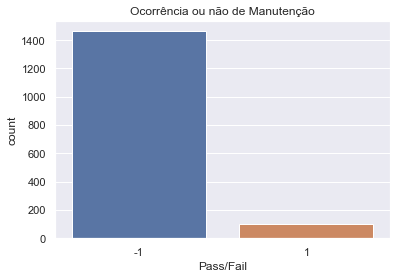

In [24]:
sns.set(style="darkgrid")
sns.countplot(x='Pass/Fail',data=sensores)
plt.title('Ocorrência ou não de Manutenção')
plt.savefig('count_plot.png')

In [25]:
sensores['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [26]:
corr = sensores.corr()
corr.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.010368,-0.007058,0.030675,-0.005749,...,0.060010,0.049862,-0.018953,0.013678,0.015206,0.013228,0.008601,0.023589,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,-0.025564,0.034062,-0.037667,-0.087315,-0.001878,...,-0.017051,-0.025490,-0.009000,0.001753,0.001303,0.002570,-0.010145,0.002273,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,-0.136225,0.018326,0.006476,0.006115,-0.000788,...,0.050434,0.064282,-0.037070,-0.000518,0.001342,0.002592,-0.028705,0.015752,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,-0.685835,-0.028223,-0.019827,-0.013157,-0.004596,...,0.008646,0.046434,0.002231,0.007634,0.006822,0.008216,0.016438,0.026019,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,-0.074368,-0.002707,-0.017523,0.011435,-0.001763,...,-0.012944,0.027696,0.005273,-0.012024,-0.012264,-0.012163,-0.004070,-0.001616,0.050910,-0.013756


Ao analisar os dados, percebeu-se que os mesmos estão desbalanceados (1463/104), isso provoca inúmeras dificuldades de convergência, desta forma, utilizou-se um método conhecido como SMOTE para gerar dados sitéticos.

In [27]:
x = sensores.iloc[:,:nn_dimensao_x-1]
y = sensores.iloc[:, nn_dimensao_x-1]

In [28]:
from sklearn.model_selection import train_test_split # Biblioteca para dividir o conjunto de dados em

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
X_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [31]:
y_resampled.value_counts() # valor de amostrar agora é balanceado

 1    1463
-1    1463
Name: Pass/Fail, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=27)


In [33]:
from sklearn.preprocessing import StandardScaler # Biblioteca para Normalizar os dados

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [37]:
np.shape(x_train) # dimensão traino

(2048, 235)

In [38]:
np.shape(x_test) # dimensão teste

(878, 235)

# Rede Neural

Nessa fase a Perceptron Multicamadas será implementada

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
clf = MLPClassifier(solver='sgd',alpha=1e-5, hidden_layer_sizes=(300, 300), random_state=1, verbose=True, max_iter=2000, learning_rate_init=1e-3, activation='logistic')

# sgd - método que utiliza o gradiente descente
# activation =  logistic - para utilizar a função sigmoide

In [41]:
clf.fit(x_train, y_train)

Iteration 1, loss = 0.76684641
Iteration 2, loss = 0.69603507
Iteration 3, loss = 0.69844694
Iteration 4, loss = 0.69381170
Iteration 5, loss = 0.69356830
Iteration 6, loss = 0.69384663
Iteration 7, loss = 0.69348782
Iteration 8, loss = 0.69332947
Iteration 9, loss = 0.69339108
Iteration 10, loss = 0.69320546
Iteration 11, loss = 0.69317607
Iteration 12, loss = 0.69305100
Iteration 13, loss = 0.69299206
Iteration 14, loss = 0.69329105
Iteration 15, loss = 0.69278552
Iteration 16, loss = 0.69301349
Iteration 17, loss = 0.69258774
Iteration 18, loss = 0.69263151
Iteration 19, loss = 0.69244023
Iteration 20, loss = 0.69240718
Iteration 21, loss = 0.69255273
Iteration 22, loss = 0.69208976
Iteration 23, loss = 0.69213384
Iteration 24, loss = 0.69206816
Iteration 25, loss = 0.69190995
Iteration 26, loss = 0.69184047
Iteration 27, loss = 0.69172610
Iteration 28, loss = 0.69171239
Iteration 29, loss = 0.69163500
Iteration 30, loss = 0.69169885
Iteration 31, loss = 0.69151223
Iteration 32, los

Iteration 253, loss = 0.64580808
Iteration 254, loss = 0.64495837
Iteration 255, loss = 0.64442313
Iteration 256, loss = 0.64394562
Iteration 257, loss = 0.64341200
Iteration 258, loss = 0.64288183
Iteration 259, loss = 0.64236408
Iteration 260, loss = 0.64180709
Iteration 261, loss = 0.64125198
Iteration 262, loss = 0.64084454
Iteration 263, loss = 0.64005231
Iteration 264, loss = 0.63970496
Iteration 265, loss = 0.63902810
Iteration 266, loss = 0.63863241
Iteration 267, loss = 0.63796670
Iteration 268, loss = 0.63733536
Iteration 269, loss = 0.63699944
Iteration 270, loss = 0.63618158
Iteration 271, loss = 0.63575218
Iteration 272, loss = 0.63499109
Iteration 273, loss = 0.63434276
Iteration 274, loss = 0.63381124
Iteration 275, loss = 0.63322769
Iteration 276, loss = 0.63250285
Iteration 277, loss = 0.63198590
Iteration 278, loss = 0.63127387
Iteration 279, loss = 0.63086894
Iteration 280, loss = 0.63020977
Iteration 281, loss = 0.62944853
Iteration 282, loss = 0.62869060
Iteration 

Iteration 502, loss = 0.44753443
Iteration 503, loss = 0.44684753
Iteration 504, loss = 0.44613348
Iteration 505, loss = 0.44572370
Iteration 506, loss = 0.44506019
Iteration 507, loss = 0.44444876
Iteration 508, loss = 0.44389094
Iteration 509, loss = 0.44327712
Iteration 510, loss = 0.44255849
Iteration 511, loss = 0.44189880
Iteration 512, loss = 0.44150335
Iteration 513, loss = 0.44067942
Iteration 514, loss = 0.44010744
Iteration 515, loss = 0.43954066
Iteration 516, loss = 0.43900023
Iteration 517, loss = 0.43847084
Iteration 518, loss = 0.43798896
Iteration 519, loss = 0.43743044
Iteration 520, loss = 0.43663643
Iteration 521, loss = 0.43600611
Iteration 522, loss = 0.43541104
Iteration 523, loss = 0.43502531
Iteration 524, loss = 0.43432023
Iteration 525, loss = 0.43372294
Iteration 526, loss = 0.43324661
Iteration 527, loss = 0.43266975
Iteration 528, loss = 0.43224473
Iteration 529, loss = 0.43165020
Iteration 530, loss = 0.43113821
Iteration 531, loss = 0.43075063
Iteration 

Iteration 751, loss = 0.35497529
Iteration 752, loss = 0.35473026
Iteration 753, loss = 0.35455537
Iteration 754, loss = 0.35433020
Iteration 755, loss = 0.35430258
Iteration 756, loss = 0.35420696
Iteration 757, loss = 0.35368652
Iteration 758, loss = 0.35348404
Iteration 759, loss = 0.35336880
Iteration 760, loss = 0.35306368
Iteration 761, loss = 0.35295666
Iteration 762, loss = 0.35269628
Iteration 763, loss = 0.35250789
Iteration 764, loss = 0.35229789
Iteration 765, loss = 0.35220421
Iteration 766, loss = 0.35194593
Iteration 767, loss = 0.35180134
Iteration 768, loss = 0.35178505
Iteration 769, loss = 0.35136313
Iteration 770, loss = 0.35111805
Iteration 771, loss = 0.35094799
Iteration 772, loss = 0.35077415
Iteration 773, loss = 0.35050271
Iteration 774, loss = 0.35056444
Iteration 775, loss = 0.35038994
Iteration 776, loss = 0.35004019
Iteration 777, loss = 0.34978546
Iteration 778, loss = 0.34971307
Iteration 779, loss = 0.34964536
Iteration 780, loss = 0.34918841
Iteration 

Iteration 1000, loss = 0.31751788
Iteration 1001, loss = 0.31757997
Iteration 1002, loss = 0.31748872
Iteration 1003, loss = 0.31731674
Iteration 1004, loss = 0.31714328
Iteration 1005, loss = 0.31706778
Iteration 1006, loss = 0.31715454
Iteration 1007, loss = 0.31678605
Iteration 1008, loss = 0.31679968
Iteration 1009, loss = 0.31667893
Iteration 1010, loss = 0.31650302
Iteration 1011, loss = 0.31629858
Iteration 1012, loss = 0.31632127
Iteration 1013, loss = 0.31618504
Iteration 1014, loss = 0.31602559
Iteration 1015, loss = 0.31593853
Iteration 1016, loss = 0.31589284
Iteration 1017, loss = 0.31576193
Iteration 1018, loss = 0.31549960
Iteration 1019, loss = 0.31548426
Iteration 1020, loss = 0.31531474
Iteration 1021, loss = 0.31519448
Iteration 1022, loss = 0.31509139
Iteration 1023, loss = 0.31507712
Iteration 1024, loss = 0.31480114
Iteration 1025, loss = 0.31494294
Iteration 1026, loss = 0.31467997
Iteration 1027, loss = 0.31456481
Iteration 1028, loss = 0.31446861
Iteration 1029

Iteration 1240, loss = 0.29312771
Iteration 1241, loss = 0.29315569
Iteration 1242, loss = 0.29297073
Iteration 1243, loss = 0.29292154
Iteration 1244, loss = 0.29280704
Iteration 1245, loss = 0.29300191
Iteration 1246, loss = 0.29276848
Iteration 1247, loss = 0.29257875
Iteration 1248, loss = 0.29257310
Iteration 1249, loss = 0.29236513
Iteration 1250, loss = 0.29225875
Iteration 1251, loss = 0.29217428
Iteration 1252, loss = 0.29206387
Iteration 1253, loss = 0.29191734
Iteration 1254, loss = 0.29218751
Iteration 1255, loss = 0.29189533
Iteration 1256, loss = 0.29175443
Iteration 1257, loss = 0.29160391
Iteration 1258, loss = 0.29153761
Iteration 1259, loss = 0.29166135
Iteration 1260, loss = 0.29131415
Iteration 1261, loss = 0.29116668
Iteration 1262, loss = 0.29113663
Iteration 1263, loss = 0.29109540
Iteration 1264, loss = 0.29089784
Iteration 1265, loss = 0.29093220
Iteration 1266, loss = 0.29096338
Iteration 1267, loss = 0.29068678
Iteration 1268, loss = 0.29076907
Iteration 1269

Iteration 1481, loss = 0.27130643
Iteration 1482, loss = 0.27115504
Iteration 1483, loss = 0.27132624
Iteration 1484, loss = 0.27089492
Iteration 1485, loss = 0.27094092
Iteration 1486, loss = 0.27076668
Iteration 1487, loss = 0.27101939
Iteration 1488, loss = 0.27070417
Iteration 1489, loss = 0.27061355
Iteration 1490, loss = 0.27042427
Iteration 1491, loss = 0.27046457
Iteration 1492, loss = 0.27028734
Iteration 1493, loss = 0.27007621
Iteration 1494, loss = 0.27017079
Iteration 1495, loss = 0.26993703
Iteration 1496, loss = 0.26994027
Iteration 1497, loss = 0.26978653
Iteration 1498, loss = 0.26977657
Iteration 1499, loss = 0.26970397
Iteration 1500, loss = 0.26975989
Iteration 1501, loss = 0.26950219
Iteration 1502, loss = 0.26938453
Iteration 1503, loss = 0.26931690
Iteration 1504, loss = 0.26917330
Iteration 1505, loss = 0.26912262
Iteration 1506, loss = 0.26909431
Iteration 1507, loss = 0.26890097
Iteration 1508, loss = 0.26892771
Iteration 1509, loss = 0.26881783
Iteration 1510

Iteration 1722, loss = 0.24919486
Iteration 1723, loss = 0.24895213
Iteration 1724, loss = 0.24914095
Iteration 1725, loss = 0.24898840
Iteration 1726, loss = 0.24890554
Iteration 1727, loss = 0.24866912
Iteration 1728, loss = 0.24857363
Iteration 1729, loss = 0.24863469
Iteration 1730, loss = 0.24855885
Iteration 1731, loss = 0.24824420
Iteration 1732, loss = 0.24822055
Iteration 1733, loss = 0.24825365
Iteration 1734, loss = 0.24801599
Iteration 1735, loss = 0.24791102
Iteration 1736, loss = 0.24792722
Iteration 1737, loss = 0.24779868
Iteration 1738, loss = 0.24780233
Iteration 1739, loss = 0.24749711
Iteration 1740, loss = 0.24760499
Iteration 1741, loss = 0.24734641
Iteration 1742, loss = 0.24721870
Iteration 1743, loss = 0.24713390
Iteration 1744, loss = 0.24708359
Iteration 1745, loss = 0.24695089
Iteration 1746, loss = 0.24694136
Iteration 1747, loss = 0.24677487
Iteration 1748, loss = 0.24687349
Iteration 1749, loss = 0.24659227
Iteration 1750, loss = 0.24641209
Iteration 1751

Iteration 1964, loss = 0.22477427
Iteration 1965, loss = 0.22473574
Iteration 1966, loss = 0.22461423
Iteration 1967, loss = 0.22442717
Iteration 1968, loss = 0.22443448
Iteration 1969, loss = 0.22418176
Iteration 1970, loss = 0.22411998
Iteration 1971, loss = 0.22400773
Iteration 1972, loss = 0.22383130
Iteration 1973, loss = 0.22376404
Iteration 1974, loss = 0.22395663
Iteration 1975, loss = 0.22367518
Iteration 1976, loss = 0.22343804
Iteration 1977, loss = 0.22327944
Iteration 1978, loss = 0.22319257
Iteration 1979, loss = 0.22308844
Iteration 1980, loss = 0.22303030
Iteration 1981, loss = 0.22316400
Iteration 1982, loss = 0.22273105
Iteration 1983, loss = 0.22266642
Iteration 1984, loss = 0.22256266
Iteration 1985, loss = 0.22244762
Iteration 1986, loss = 0.22234696
Iteration 1987, loss = 0.22217482
Iteration 1988, loss = 0.22241900
Iteration 1989, loss = 0.22203194
Iteration 1990, loss = 0.22188093
Iteration 1991, loss = 0.22194270
Iteration 1992, loss = 0.22165277
Iteration 1993

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300, 300), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [42]:
Y_axis = clf.loss_curve_

# VALIDAÇÃO

Nessa fase sera realizado o processo de validação, para ver se o algoritmo funcionou como esperado

In [43]:
Y_axis_shape = np.shape(Y_axis)

In [44]:
X_axis = np.linspace(0, clf.n_iter_, Y_axis_shape[0])

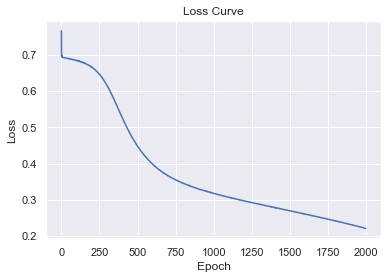

In [46]:
plt.plot(X_axis, Y_axis)
plt.title('Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('loss_curve')

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
predictions = clf.predict(x_test)

In [49]:
m_conf = confusion_matrix(y_test, predictions)

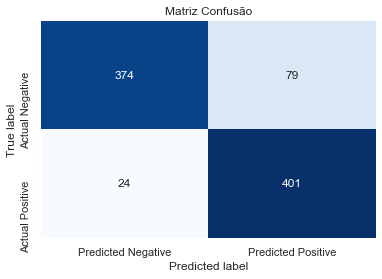

In [50]:
sns.heatmap(pd.DataFrame(m_conf, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive']),annot=True, cmap='Blues', fmt='d', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz Confusão')
plt.savefig('M_conf')

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.94      0.83      0.88       453
           1       0.84      0.94      0.89       425

    accuracy                           0.88       878
   macro avg       0.89      0.88      0.88       878
weighted avg       0.89      0.88      0.88       878

